# VOO Price Prediction Model

### Import Packages

In [44]:
# Install yfinance (Yahoo Finance market data downloader) 
!pip install yfinance

In [45]:
# Import external packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [46]:
import yfinance as yf
import pandas as pd

ticker = 'SGLN'
stock_data = pd.DataFrame()

try:  # Wrap the download and data access in a try-except block
    downloaded_data = yf.download(ticker, start='2013-1-1', end='2019-12-31')

    print(downloaded_data.head())      # Print the first few rows to see the columns
    print(downloaded_data.columns)   # Print all the column names

    if downloaded_data.empty:  # Check if the downloaded DataFrame is empty
        raise ValueError(f"No data downloaded for {ticker}. Check the ticker symbol and date range.")

    if 'Adj Close' in downloaded_data.columns:
        stock_data[ticker] = downloaded_data['Adj Close']
    elif 'Close' in downloaded_data.columns:  # Use elif for efficiency
        stock_data[ticker] = downloaded_data['Close']
        print(f"Warning: 'Adj Close' not found, using 'Close' for {ticker}")
    else:
        raise KeyError(f"Neither 'Adj Close' nor 'Close' found for {ticker}") # Raise KeyError to be caught

    print(stock_data.head())  # Print the stock_data to verify the column was added correctly

except (KeyError, ValueError) as e:  # Catch potential errors
    print(f"Error processing {ticker}: {e}")
    # Handle the error appropriately, e.g., exit, skip, or log
    exit() # Or continue if you have a loop


[*********************100%***********************]  1 of 1 completed

Price        Close    High     Low    Open   Volume
Ticker        SGLN    SGLN    SGLN    SGLN     SGLN
Date                                               
2013-01-02  0.0001  0.0001  0.0001  0.0001  1025000
2013-01-03  0.0002  0.0002  0.0001  0.0001  1423389
2013-01-04  0.0002  0.0002  0.0002  0.0002        0
2013-01-07  0.0002  0.0002  0.0002  0.0002        0
2013-01-08  0.0002  0.0002  0.0002  0.0002        0
MultiIndex([( 'Close', 'SGLN'),
            (  'High', 'SGLN'),
            (   'Low', 'SGLN'),
            (  'Open', 'SGLN'),
            ('Volume', 'SGLN')],
           names=['Price', 'Ticker'])
              SGLN
Date              
2013-01-02  0.0001
2013-01-03  0.0002
2013-01-04  0.0002
2013-01-07  0.0002
2013-01-08  0.0002


### Observations - Extract Data from Yahoo Finance

[*********************100%***********************]  1 of 1 completed


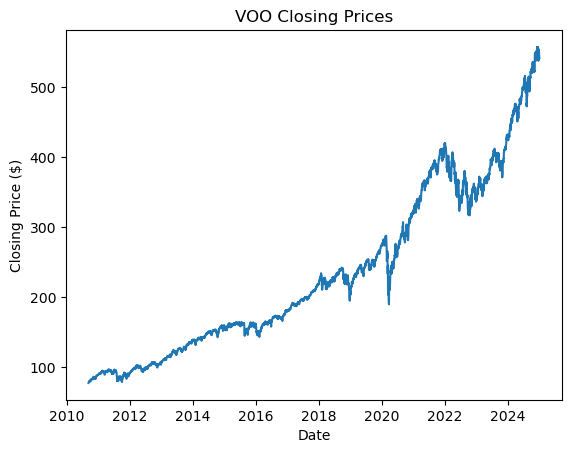

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Extract data from Yahoo Finance
ticker = 'VOO'
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start='2000-1-1', end='2024-12-31')['Close']

plt.plot(stock_data.index, stock_data[ticker]) 
plt.title(f"{ticker} Closing Prices") 
plt.xlabel("Date") 
plt.ylabel("Closing Price ($)")  
plt.show()  

### Distributions - Calculate Historical Returns and Statistical Measures

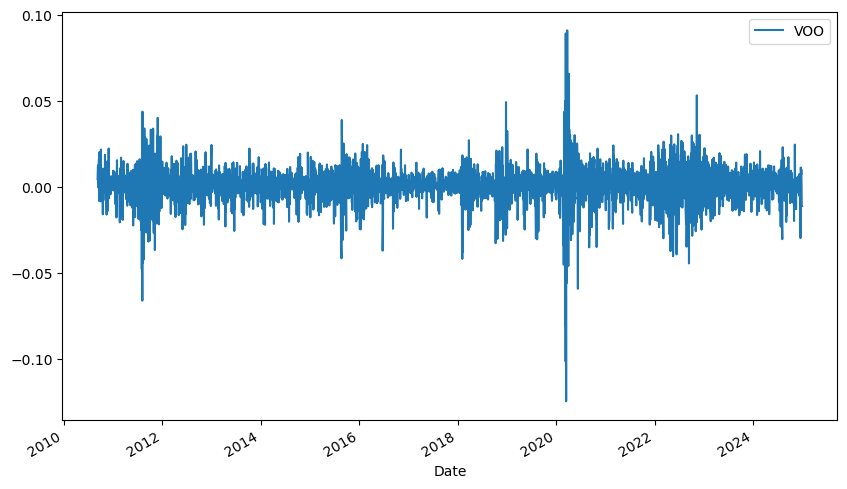

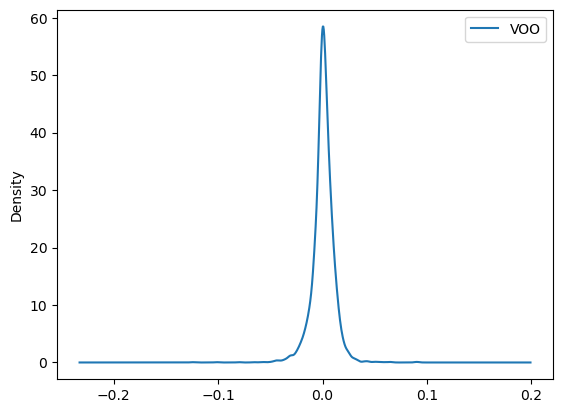

In [60]:
# Calculate historical log returns
log_returns = np.log(1 + stock_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (10, 6));

# Show the distribution of the log returns
log_returns.plot.density();



In [61]:
# Calculate key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

### Simulations - Simulate Future Daily Returns and Future Prices

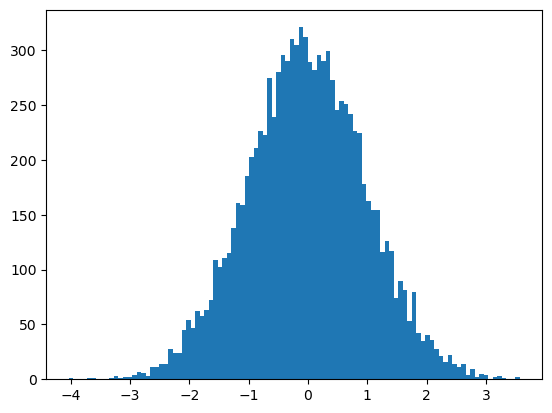

In [63]:
# Generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Use randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100);

In [ ]:
# Simulate future daily returns
t_intervals = 250 
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [64]:
# Using returns, calculate future price progression in each simulation

# Latest known stock price for VOO
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list

array([[540.98999023, 540.98999023, 540.98999023, ..., 540.98999023,
        540.98999023, 540.98999023],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

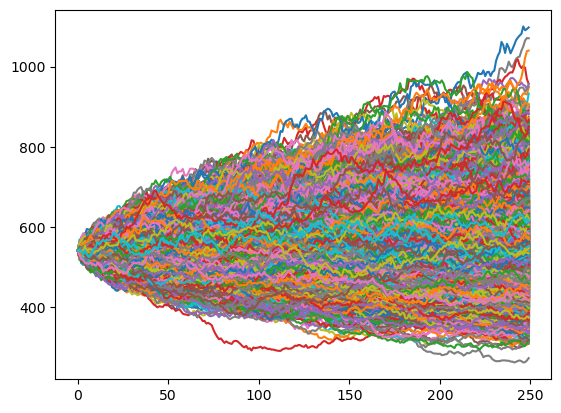

In [66]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated[t]

# Plot simulated future VOO prices
plt.plot(price_list);

### Including Drift

In [67]:
# Calculate drift
drift = mean - (0.5*variance)

# Simulate future daily returns
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated +drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

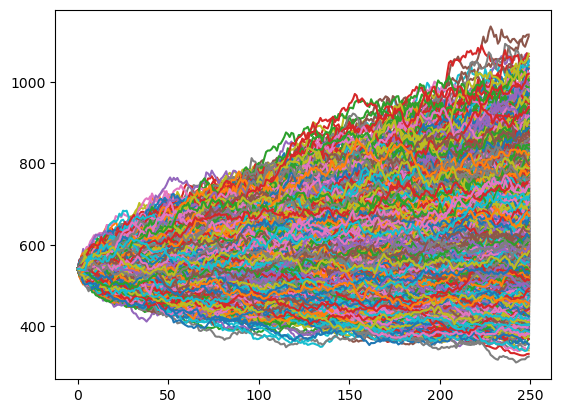

In [ ]:
# Create variable for the latest price of VOO
last_price = stock_data.iloc[-1]

# Create array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)

# Set the first row to the starting stock price
price_list[0] = last_price

# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated_withdrift[t]

# Plot simulated future VOO prices
plt.plot(price_list);

### Quantifications - Examine the worst, average, best scenarios and the probability distribution

In [56]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(),2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)

# Examine the worst, average, and best stock price sceanrios
print("Best and Worst Cases")
print(f"Worst Simulation $/share: {WorstSim}")
print(f"Avg Simulation $/share: {AvgSim}")
print(f"Best Simulation $/share: {BestSim}")

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices 
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${LowerInterval_1SD} and ${round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(LowerInterval_2SD,2)} and ${round(UpperInterval_2SD,2)}")

Best and Worst Cases
Worst Simulation $/share: 332.8
Avg Simulation $/share: 618.16
Best Simulation $/share: 1226.01

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $512.4997608157757 and $723.83
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $406.84 and $829.49
